## 1. Introduction:
**Here we want to talk about the subject matter domain, an overall take on what makes the topic interesting, and our research questions.** 


The United States has the highest incarcerated population in the world, with about 720 prisoners per 100,000 residents, according to the BBC. In 2018 the Department of Eduction found that the U.S. spends over $80 billion annually on corrections. They also found that, over the last 30 years, corrections spending has grown three times faster than education spending.

Crime reduction has long been a foundation of the U.S. corrections system, and a justification for its human and financial consequences. This analysis will address the question of whether or not incarceration leads to reduced crime.


## 2. Hypotheses: 
**Given our general research questions that are based on some interesting observation or outside trend, our next step is to formally state which hypotheses we want to test.88

Group A - states with increased incarceration/capita from 2001 to 2016 
<br>Group B - states with decreased incarceration/capita from 2001 to 2016 

_H_<sub>0</sub> : There is no significant difference between the average crimes/capita for states in Group A vs states in Group B. 
<br>_H_<sub>a</sub> : There is a significant difference between the average crimes/capita for states in Group A vs states in Group B. 


## 3. Data:
**Now that we have walked through the relevance of the topic, posed our research questions, and framed testable hypotheses based on those questions, it's time to introduce the dataset. Tell us about the data -- when and where was it collected? Perhaps include descriptive statistics or measures of distribution.**

The dataset focuses on crime and incarceration in the United States. It contains information for all 50 states, stretching from 2001 to 2016. Included are incarceration rates, crime rates by type, and state population. My background is in criminology and restorative justice, and I've previously looked at crime statistics across countries, but never by state. It will be interesting to see what patterns exist, both between states and within the same state over time.

In [196]:
# Set up environment

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [76]:
data = pd.read_csv(r'C:\Users\catem\data-science-projects\capstones\experimental_design\crime_and_incarceration_by_state.csv')


# Convert column headers to lowercase for ease of coding
data.columns = data.columns.str.lower()


# Get basic overview of the data
print(data.shape)

data.info()
data.head()


(816, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jurisdiction            816 non-null    object 
 1   includes_jails          816 non-null    bool   
 2   year                    816 non-null    int64  
 3   prisoner_count          816 non-null    int64  
 4   crime_reporting_change  799 non-null    object 
 5   crimes_estimated        799 non-null    object 
 6   state_population        799 non-null    float64
 7   violent_crime_total     799 non-null    float64
 8   murder_manslaughter     799 non-null    float64
 9   rape_legacy             749 non-null    float64
 10  rape_revised            199 non-null    float64
 11  robbery                 799 non-null    float64
 12  agg_assault             799 non-null    float64
 13  property_crime_total    799 non-null    float64
 14  burglary                799 non-

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0


## 4. Methods:
**Explain the steps needed to test the hypotheses. This includes any data wrangling, tests, and visualizations that you will need to definitively reject or fail to reject your null hypotheses.**

**Data wrangling:**

Removing entries for states who include jails in their prisoner count. Also removing entries for federal prisoners, as that data will not be used while comparing states.

In [77]:
print(data.loc[data.includes_jails, 'includes_jails'].count())
data = data.loc[data.includes_jails == False]
data = data.loc[data.jurisdiction != 'FEDERAL']

96


Adding columns for percent of the state population incarcerated total crime and crime per capita per state year.

In [166]:
data['perc_incar'] = (data['prisoner_count'] / data['state_population']) * 100
data['total_crime'] = data['violent_crime_total'] + data['property_crime_total']
data['cri_per_cap'] = data['total_crime'] / data['state_population']
data.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,perc_incar,total_crime,cri_per_cap
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0,0.553625,192835.0,0.043150
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0,0.522144,322549.0,0.060778
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0,0.426356,111296.0,0.041302
5,CALIFORNIA,False,2001,157142,False,False,34600463.0,212867.0,2206.0,9960.0,NaN,64614.0,136087.0,1134189.0,232273.0,697739.0,204177.0,0.454162,1347056.0,0.038932
6,COLORADO,False,2001,17278,False,False,4430989.0,15492.0,158.0,1930.0,NaN,3555.0,9849.0,170887.0,28533.0,121360.0,20994.0,0.389936,186379.0,0.042063


Dropping rows with null values for state population.

In [127]:
print(data.isnull().sum())
data.dropna(subset=['state_population'], inplace=True)

jurisdiction                0
includes_jails              0
year                        0
prisoner_count              0
crime_reporting_change      0
crimes_estimated            0
state_population            0
violent_crime_total         0
murder_manslaughter         0
rape_legacy                44
rape_revised              528
robbery                     0
agg_assault                 0
property_crime_total        0
burglary                    0
larceny                     0
vehicle_theft               0
perc_incar                  0
total_crime                 0
dtype: int64


Breaking the data down into two groups based on states that had increased vs. decreased incarceration/capita over the 15 year period. Excluding results for changes smaller than .01 to account for small annual fluctuations that are likely not attributed to policy

In [186]:
# create a dataframe for each of the years we'll be looking at
first_year = data.loc[data.year == 2001].reset_index()
last_year = data.loc[data.year == 2016].reset_index()

# set up new dataframe for differences
diffs = pd.DataFrame(columns=['diff_incar'])
# create column with differences for percent incarcerated
diffs['diff_incar'] = last_year['perc_incar'] - first_year['perc_incar']

# set up a list to hold results
groups = []

# iterate through diff_incar
for i in differences['diff_incar']:
    
    # append all significant positive changes to group as As
    if i > .01:
        group = 'A'
        groups.append(group)
    
    # append all sig neg changes as Bs
    elif i < -.01:
        group = 'B'
        groups.append(group)
    
    # append all insignificant changes as Cs
    else:
        group ='C'
        groups.append(group)

# add column for group designations for each record
diffs['group'] = groups
diffs.head()

,diff_incar,group
0,-0.065099,B
1,0.089380,A
2,0.103489,A
3,-0.124829,B
4,-0.037573,B


Calculating differences in crimes/capita for each record

In [187]:
diffs['diff_crime'] = last_year['cri_per_cap'] - first_year['cri_per_cap']
diffs.head()

,diff_incar,group,diff_crime
0,-0.065099,B,-0.008352
1,0.089380,A,-0.026060
2,0.103489,A,-0.002933
3,-0.124829,B,-0.008983
4,-0.037573,B,-0.011109


Creating a dataframe for each group

In [189]:
incar_up = diffs.loc[diffs.group == 'A'].reset_index()
incar_down = diffs.loc[diffs.group == 'B'].reset_index()

Since we only have about 20 entries for each group, creating a sampling distribution to reduce the effect of outliers.

**Testing for normality: (And other assumptions for t-test)**
 Following normality testing, an appropriate statistical test will be run to determine whether or not there is a significant difference in the population means of the two groups. If, at this point, the null hypothesis can be rejected, a confidence interval will be calculated to determine the substantive value of the findings. 

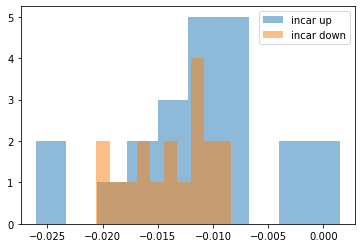

In [204]:
plt.hist(incar_up['diff_crime'], alpha = .5)
plt.hist(incar_down['diff_crime'], alpha=.5)

plt.legend(['incar up', 'incar down'], loc='upper right')
plt.show()

Visual inspection of the histograms for the test variable suggests the distribution is not normal. Running tests on the variable to confirm distribution.

In [205]:
print(stats.describe(incar_up['diff_crime']))
print(stats.describe(incar_down['diff_crime']))

print(stats.shapiro(incar_up['diff_crime']))
print(stats.shapiro(incar_down['diff_crime']))

DescribeResult(nobs=22, minmax=(-0.026059728391556194, 0.0015214056256038014), mean=-0.01110529018523561, variance=4.948089310604641e-05, skewness=-0.18846750023594122, kurtosis=0.016781742517948395)
DescribeResult(nobs=18, minmax=(-0.020562693270399564, -0.008352374224565064), mean=-0.013614005672832698, variance=1.3521953010714025e-05, skewness=-0.3846454924939584, kurtosis=-0.9948602307091345)
ShapiroResult(statistic=0.9585549235343933, pvalue=0.46063241362571716)
ShapiroResult(statistic=0.9505112767219543, pvalue=0.43309417366981506)


Even though the histogram does not look normal, the test results show we cannot reject the null hypothesis that the distribution is normal. 

Checking for similar variability by calculating the standard deviation for each group and comparing

In [206]:
print(np.std(incar_up['diff_crime']))
print(np.std(incar_down['diff_crime']))

0.0068725367660876216
0.003573616291518676


The groups appear to have similar variations.

Running a T-test on the groups.

In [207]:
stats.ttest_ind(incar_up['diff_crime'], incar_down['diff_crime'])

Ttest_indResult(statistic=1.3659499742469547, pvalue=0.1799849762152975)

Since the t-statistic of 1.37 is not &plusmn; 1.96, and the p-value is greater than .05, we cannot reject the null hypothesis that there is no significant difference between the average crimes/capita for states in Group A vs states in Group B.

## 5.	Results:
**Now, we can walk through the results of the methods. State here the results of your tests and whether these results mean that you reject or fail to reject the null. Also, include compelling tables or graphs to illustrate your findings.**

## 6. Discussion & recommendations:

**What insights can interested parties get from this research? What would you recommend as further research?**

These findings will help policy makers and elected officials make informed decisions when allocating money for corrections and when handling issues of criminal justice reform. Political hopefulls can use these findings to inform their campaign's approach to crime.

**Limitations of the study:**
using only the first and last year to determine change in crime rate ignores any differences during the intervening years

In [32]:
prisoner_sorted = data.sort_values(by=['prisoner_count'], ascending=False).reset_index()
# prisoner_sorted.head(30)

California and Texas follow federal for the highest prisoner population most years. 

In [66]:
# data.sort_values(by='state_population', ascending=False).reset_index().head()

California and Texas are also the most populace states

In [39]:
#state_pris.sort_values(by='perc_incar', ascending=False).reset_index().head()

Texas and Oklahoma lead the country most years for highest percentage of population incarcerated

In [ ]:
state_pris.sort_values(by=['total_crime'], ascending=False).reset_index().head()

California and Texas lead for total crime most years

In [65]:
# cali = data.loc[data['jurisdiction'] == 'CALIFORNIA']

# cali.head(10)
# cali.info()

In [ ]:
# plt.plot(state_pris.loc[state_pris['jurisdiction'] == 'CALIFORNIA'].groupby)
sns.lineplot('year', 'perc_incar', data=cali)

California has a distinct drop in percent incarcerated around 2009

In [ ]:
sns.scatterplot(x='year', y='perc_incar', data=state_pris)

In [ ]:
# perc_by_year = state_pris[['year', 'perc_incar', 'jurisdiction']]
# pby_pivot = perc_by_year.pivot(index='year', columns='jurisdiction', values='perc_incar')
# sns.kdeplot(data=pby_pivot)
# # perc_by_year.head()
# ##

In [ ]:
# values = data[(data['prisoner_count', 'state_population'])]

In [ ]:
pris_cust_by_state.head()
ucr_by_state.head()

In [ ]:
# sns.scatterplot(x='year', y='prisoner_count', hue='jurisdiction', data=data)
#plt.hist(data['prisoner_count'])
# sns.scatterplot(x='year', y='violent_crime_total', data=data)
#sns.scatterplot(x='year', y='property_crime_total', data=data)
plt.hist(data['prisoner_count'])
plt.show()

In [ ]:
data['prisoner_count'].corr(data['violent_crime_total'])

In [ ]:
# #state_groups = data.groupby(['jurisdiction']).agg({'violent_crime_total': ['mean'], 'prisoner_count': ['mean']})
# print(state_groups.sort_values(by=state_groups['prisoner_count'], ascending=False))

In [ ]:
# g = sns.PairGrid(diag_sharey=False)
# g.map_lower(sns.kdeplot)
# g.map_offdiag(plt.scatter, s=15)

In [ ]:
states_yearly = data.pivot(index='year', columns='jurisdiction')

In [ ]:
states_yearly.head()